In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

In [34]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(22, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

../data/CBFB_MYH11/BTB/single_cell_probabilities.npy
../data/CBFB_MYH11/AQK/single_cell_probabilities.npy
../data/CBFB_MYH11/DQV/single_cell_probabilities.npy
../data/CBFB_MYH11/BJK/single_cell_probabilities.npy
../data/CBFB_MYH11/BSN/single_cell_probabilities.npy


/tmp/ipykernel_48916/3975168805.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))
/tmp/ipykernel_48916/3975168805.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


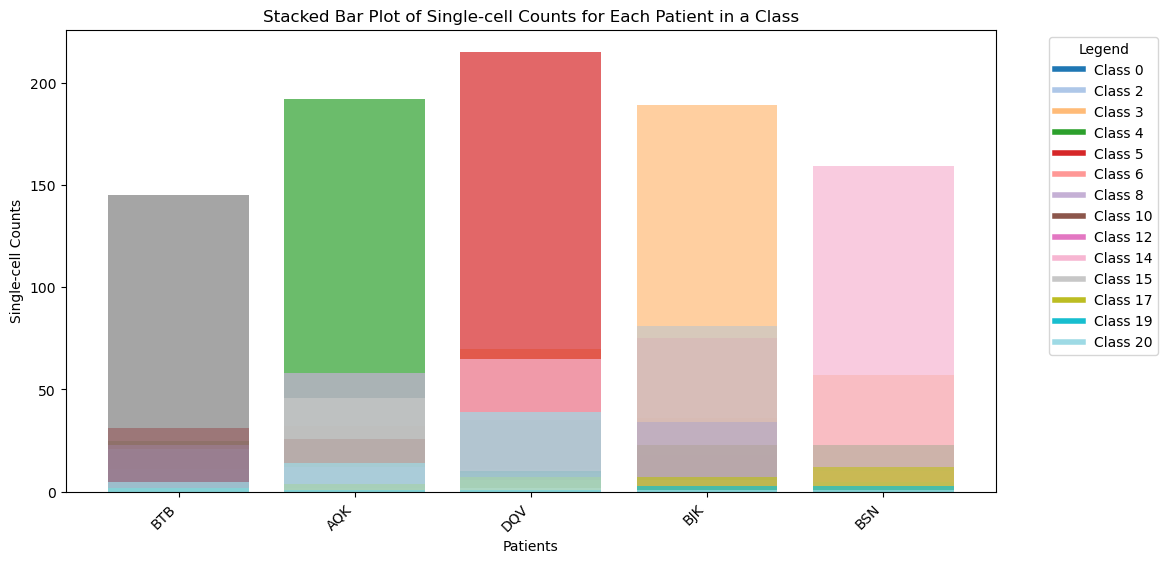

In [35]:
# Path to the folder containing your files
class_path = '../data/CBFB_MYH11'

# Initialize lists to store data for plotting
patient_folder_names = []
stacked_counts_vectors = []

# Iterate over all files in the folder
for patient_folder in os.listdir(class_path):

    if(len(patient_folder)==3):
    
        probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

        print(probs_path)
        sc_probs = np.load(probs_path)
        sc_class= np.argmax(sc_probs, axis=1)
        counts_vector,unique_labels = get_counts_vector(sc_class)

        # Create a custom color list for each position
        cmap = get_cmap('tab20', len(unique_labels))
        colors = [cmap(i) for i in range(len(unique_labels))]
        
        # Append data for plotting
        patient_folder_names.append(patient_folder)
        stacked_counts_vectors.append((counts_vector, unique_labels, colors))

cmap = get_cmap('tab20')

# Create a stacked bar plot for each file
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, (counts_vector, unique_labels, colors) in enumerate(stacked_counts_vectors):
    ax.bar(patient_folder_names[i], counts_vector[unique_labels], label=f"File {i + 1}", alpha=0.7, color=colors)

# Create a legend showing which color corresponds to which class label
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
ax.set_xlabel("Patients")
ax.set_ylabel("Single-cell Counts")
ax.set_title("Stacked Bar Plot of Single-cell Counts for Each Patient in a Class")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

/tmp/ipykernel_48916/581728314.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))


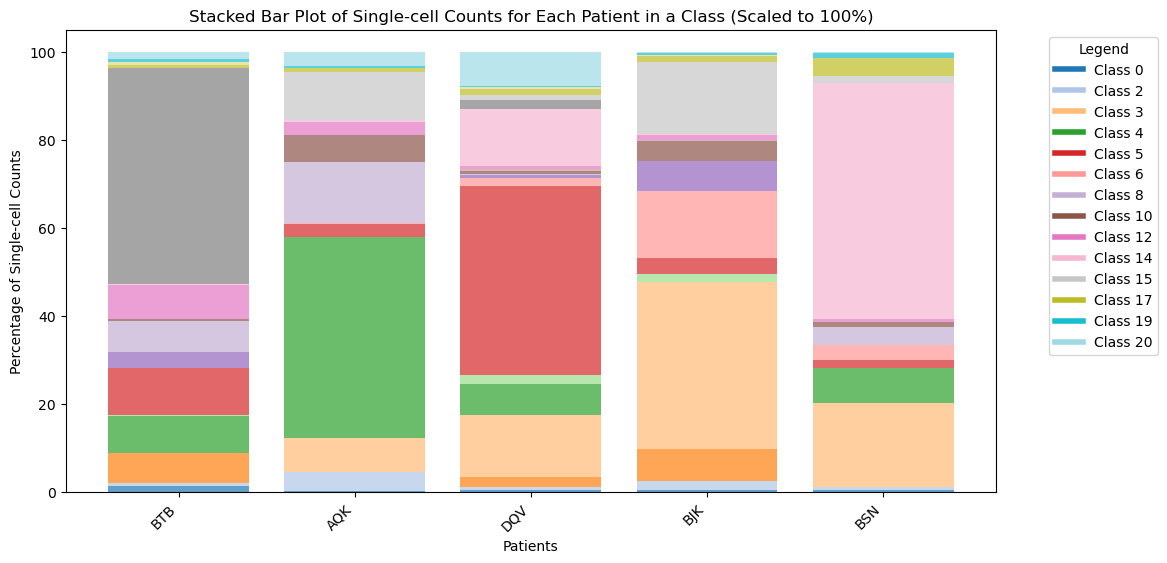

In [36]:
# Path to the folder containing your files

class_path = '../data/CBFB_MYH11'

# Initialize lists to store data for plotting
patient_folder_names = []
stacked_counts_vectors = []

# Iterate over all files in the folder
for patient_folder in os.listdir(class_path):
    if len(patient_folder) == 3:
        probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

        #print(probs_path)
        sc_probs = np.load(probs_path)
        sc_class = np.argmax(sc_probs, axis=1)
        counts_vector, unique_labels = get_counts_vector(sc_class)

        # Normalize counts to percentages
        counts_percentages = counts_vector / np.sum(counts_vector) * 100

        # Create a custom color list for each position
        cmap = get_cmap('tab20', len(unique_labels))
        colors = [cmap(i) for i in range(len(unique_labels))]

        # Append data for plotting
        patient_folder_names.append(patient_folder)
        stacked_counts_vectors.append((counts_percentages, unique_labels, colors))

# Create a stacked bar plot for each file
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, (counts_percentages, unique_labels, colors) in enumerate(stacked_counts_vectors):
    bottom = 0
    for label, color in zip(unique_labels, colors):
        ax.bar(patient_folder_names[i], counts_percentages[label], label=f"Class {label}", alpha=0.7, color=color, bottom=bottom)
        bottom += counts_percentages[label]

# Create a legend showing which color corresponds to which class label
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
ax.set_xlabel("Patients")
ax.set_ylabel("Percentage of Single-cell Counts")
ax.set_title("Stacked Bar Plot of Single-cell Counts for Each Patient in a Class (Scaled to 100%)")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


/tmp/ipykernel_48916/2486192402.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))


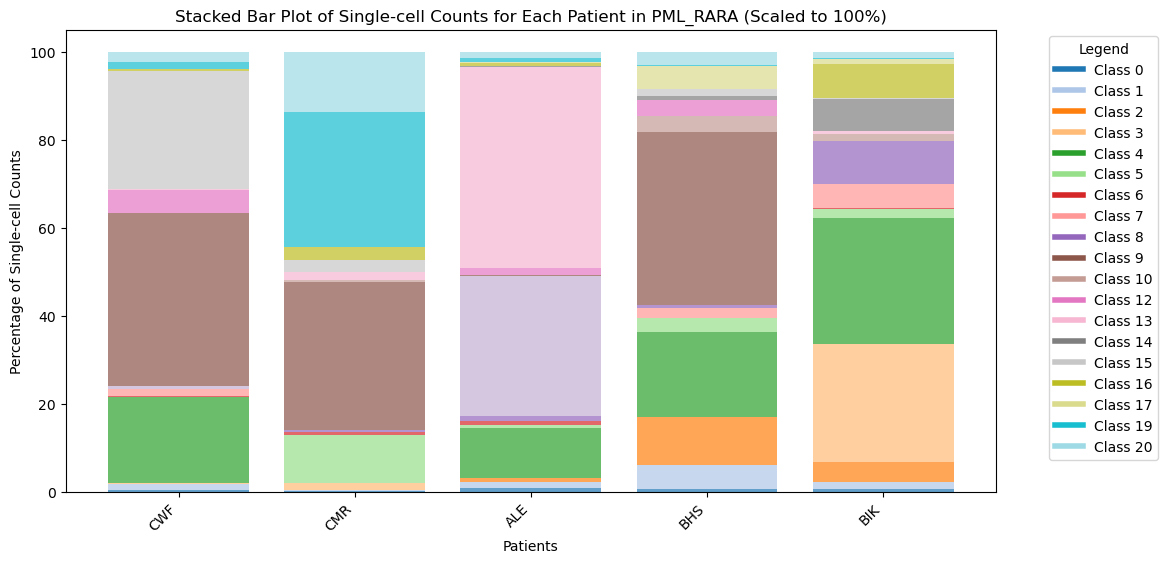

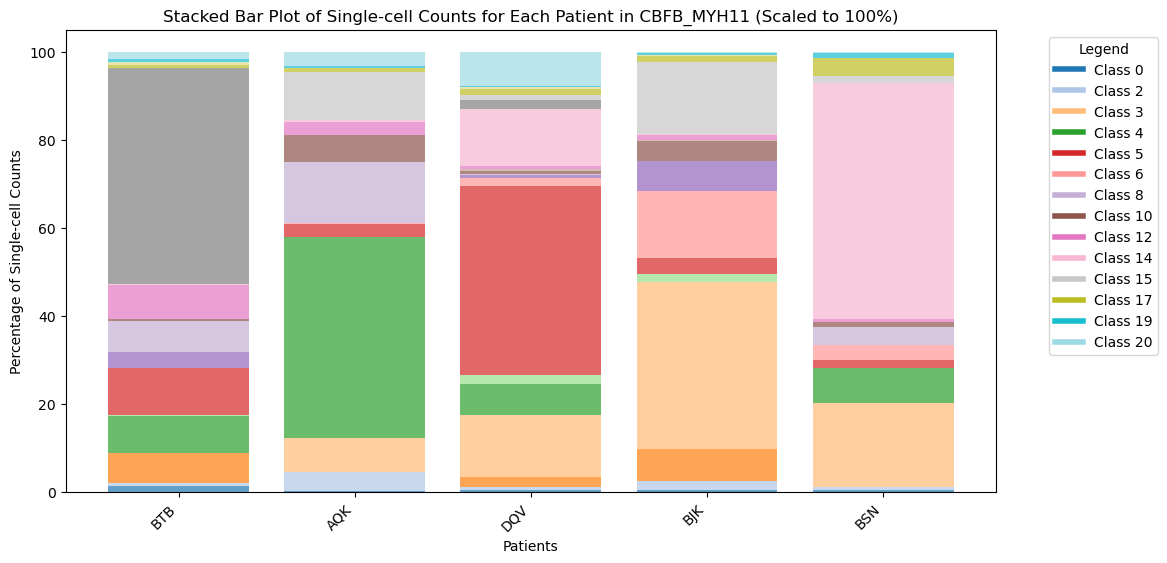

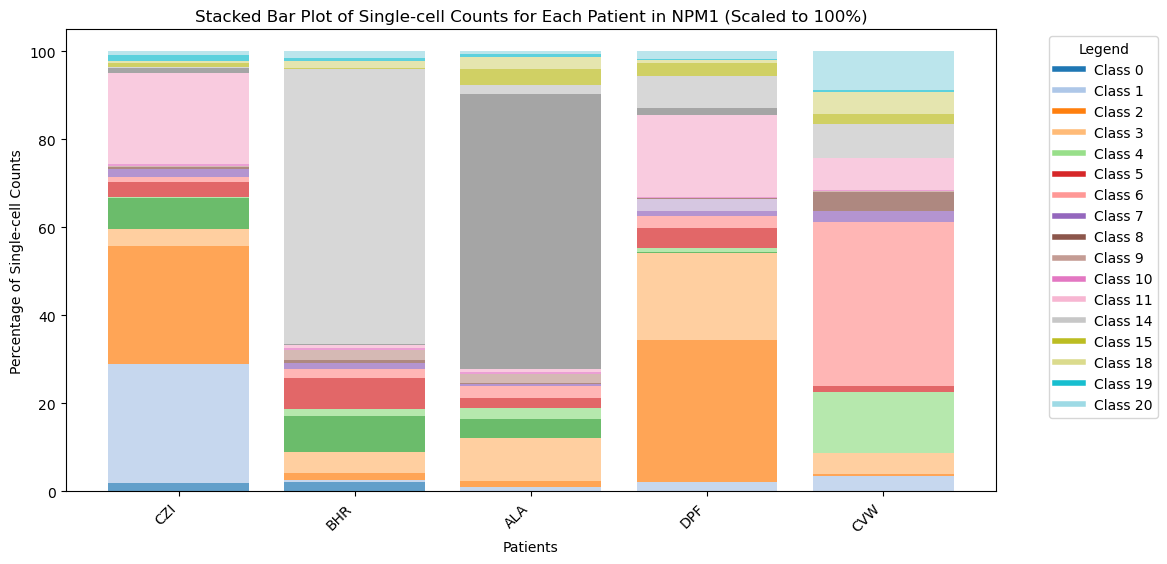

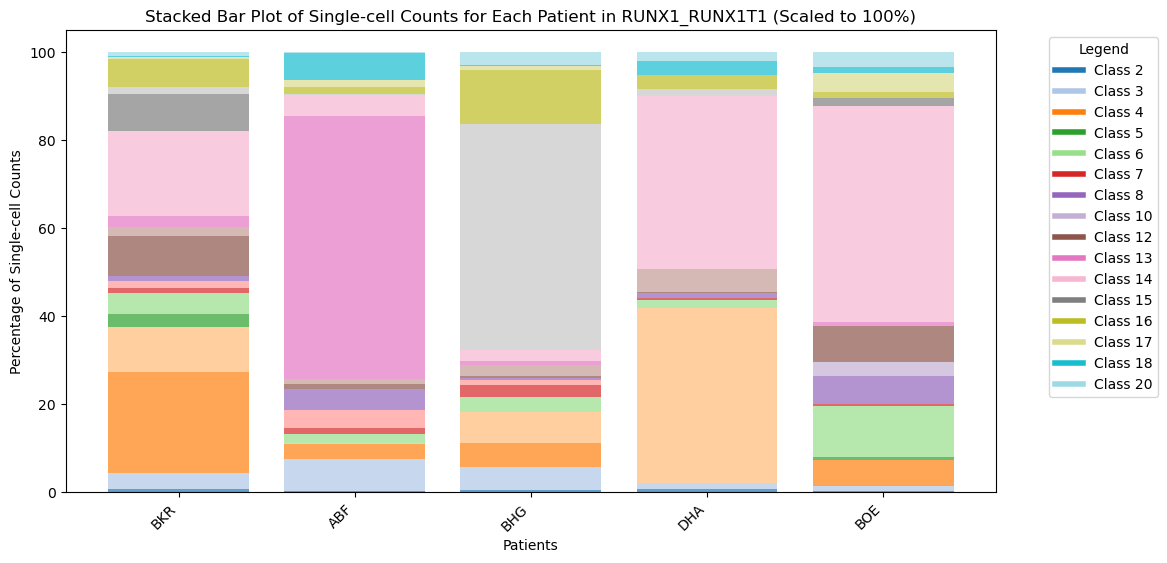

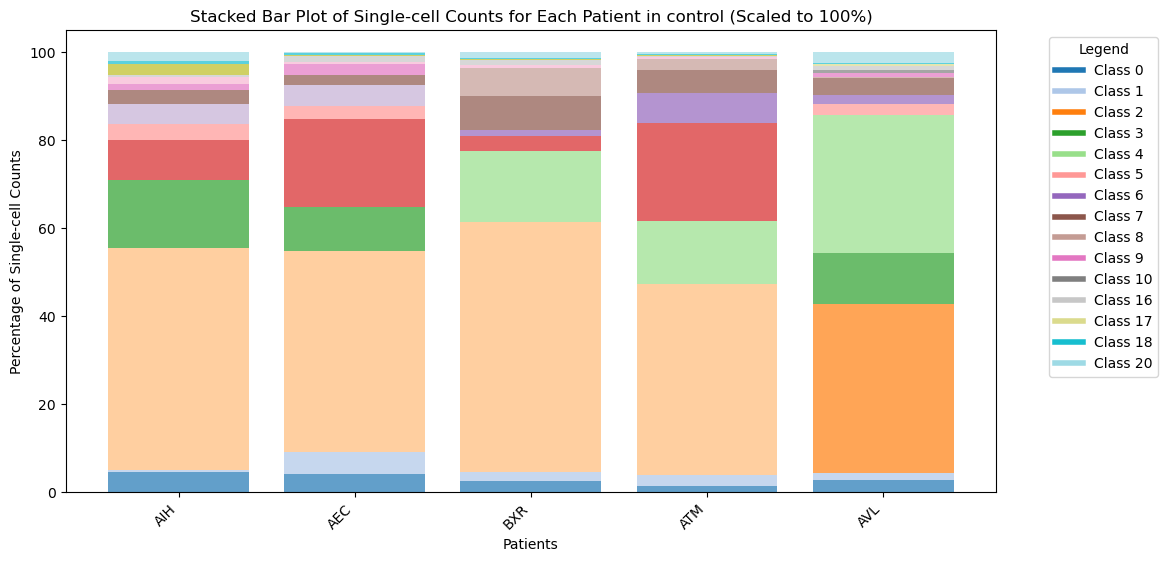

In [37]:
# Path to the folder containing your subfolders
data_path = '../data'

# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        # Initialize lists to store data for plotting
        patient_folder_names = []
        stacked_counts_vectors = []

        # Iterate over all files in the folder
        for patient_folder in os.listdir(class_path):
            if len(patient_folder) == 3:
                probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

                #print(probs_path)
                sc_probs = np.load(probs_path)
                sc_class = np.argmax(sc_probs, axis=1)
                counts_vector, unique_labels = get_counts_vector(sc_class)

                # Normalize counts to percentages
                counts_percentages = counts_vector / np.sum(counts_vector) * 100

                # Create a custom color list for each position
                cmap = get_cmap('tab20', len(unique_labels))
                colors = [cmap(i) for i in range(len(unique_labels))]

                # Append data for plotting
                patient_folder_names.append(patient_folder)
                stacked_counts_vectors.append((counts_percentages, unique_labels, colors))

        # Create a stacked bar plot for each file in the class
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, (counts_percentages, unique_labels, colors) in enumerate(stacked_counts_vectors):
            bottom = 0
            for label, color in zip(unique_labels, colors):
                ax.bar(patient_folder_names[i], counts_percentages[label], label=f"Class {label}", alpha=0.7, color=color, bottom=bottom)
                bottom += counts_percentages[label]

        # Create a legend showing which color corresponds to which class label
        legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)]
        ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Add labels and legend
        ax.set_xlabel("Patients")
        ax.set_ylabel("Percentage of Single-cell Counts")
        ax.set_title(f"Stacked Bar Plot of Single-cell Counts for Each Patient in {class_folder} (Scaled to 100%)")

        # Rotate x-axis labels for better visibility
        plt.xticks(rotation=45, ha='right')

        # Show the plot for each class
        plt.show()


/tmp/ipykernel_48916/714101993.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))


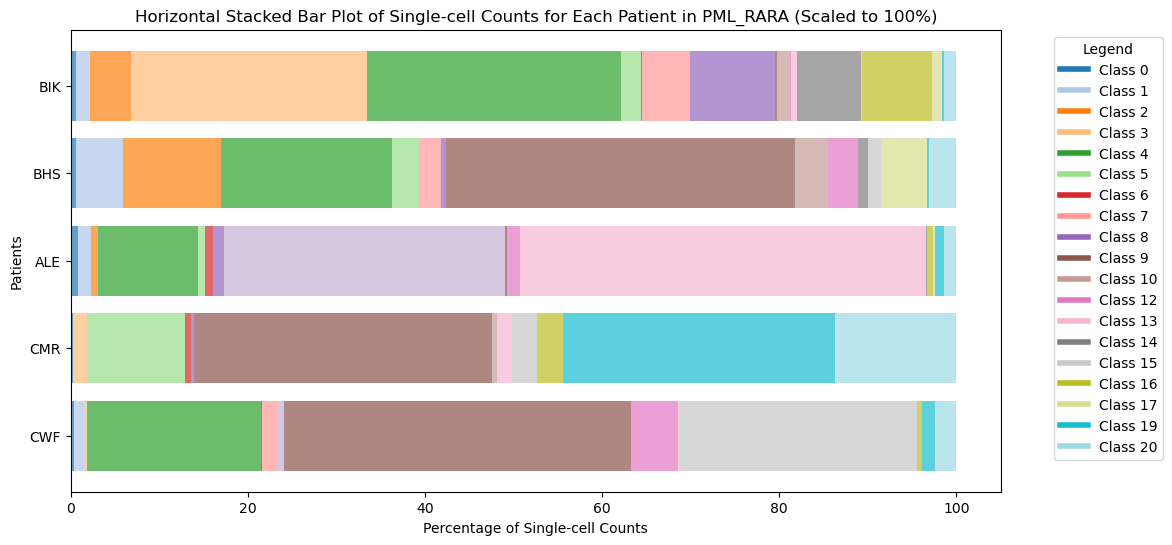

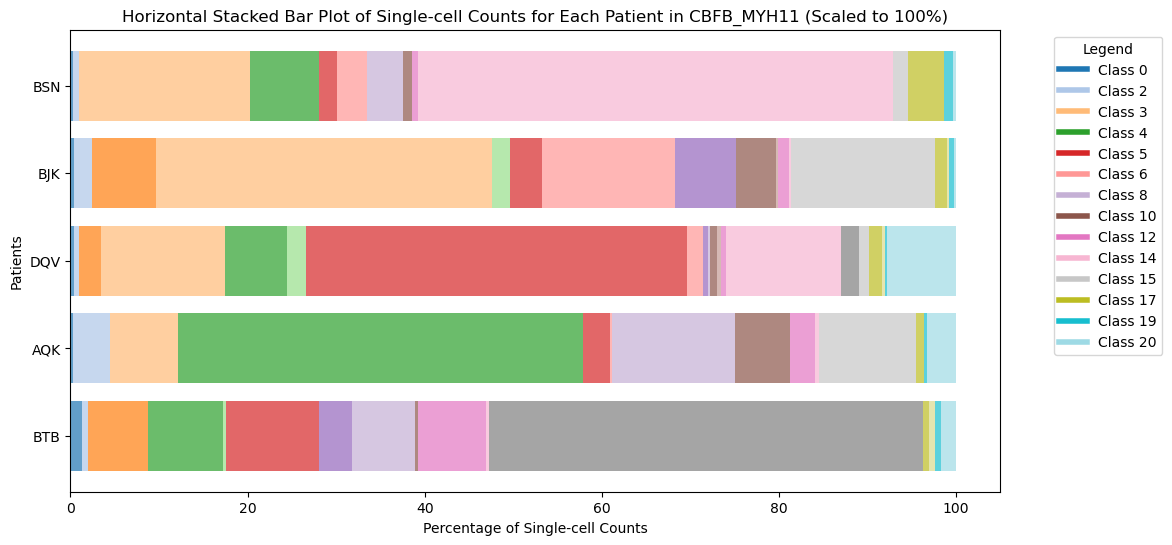

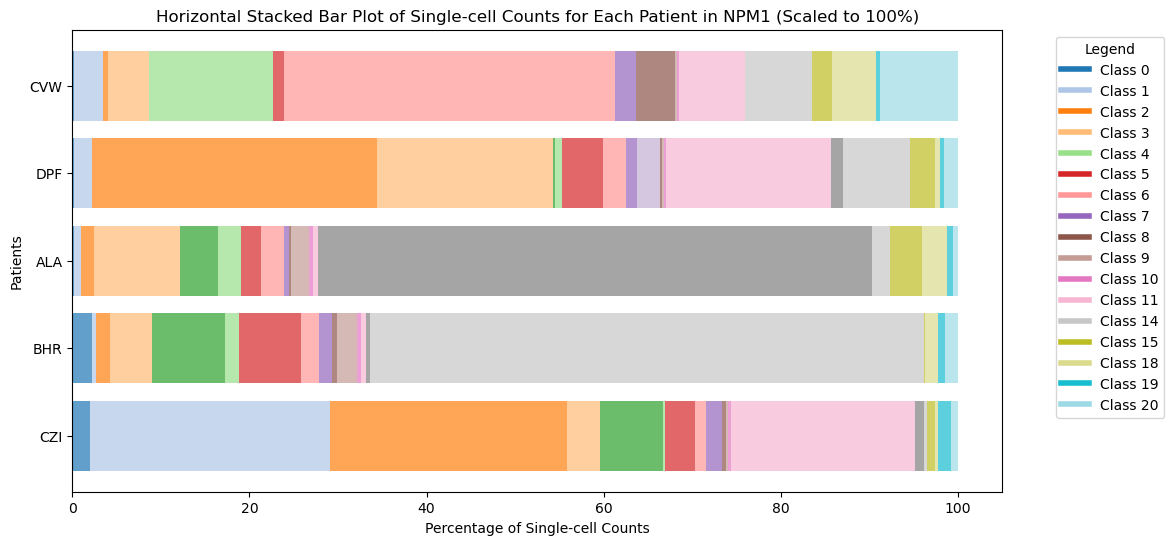

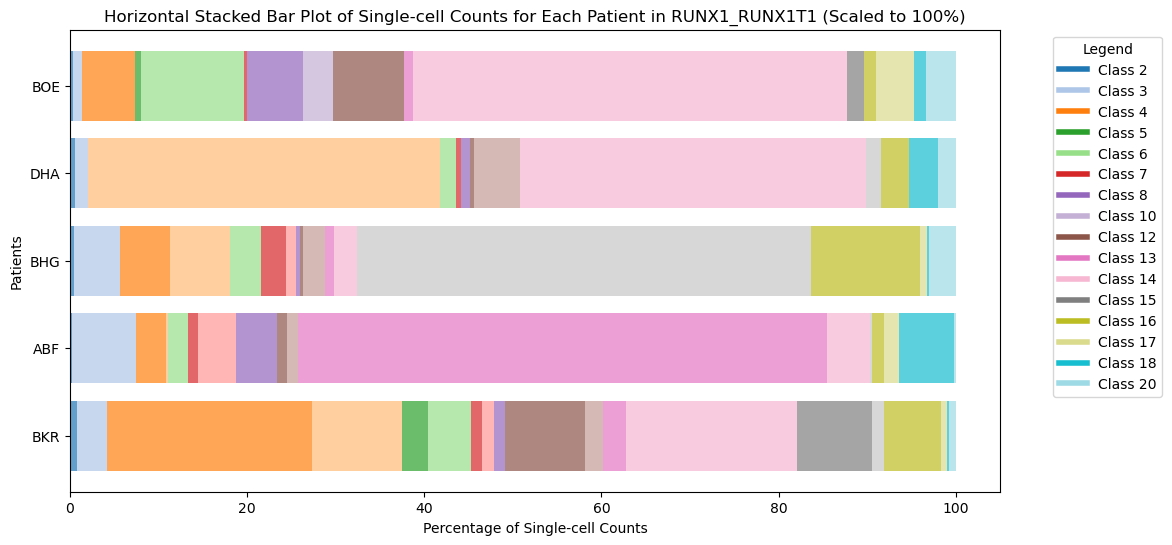

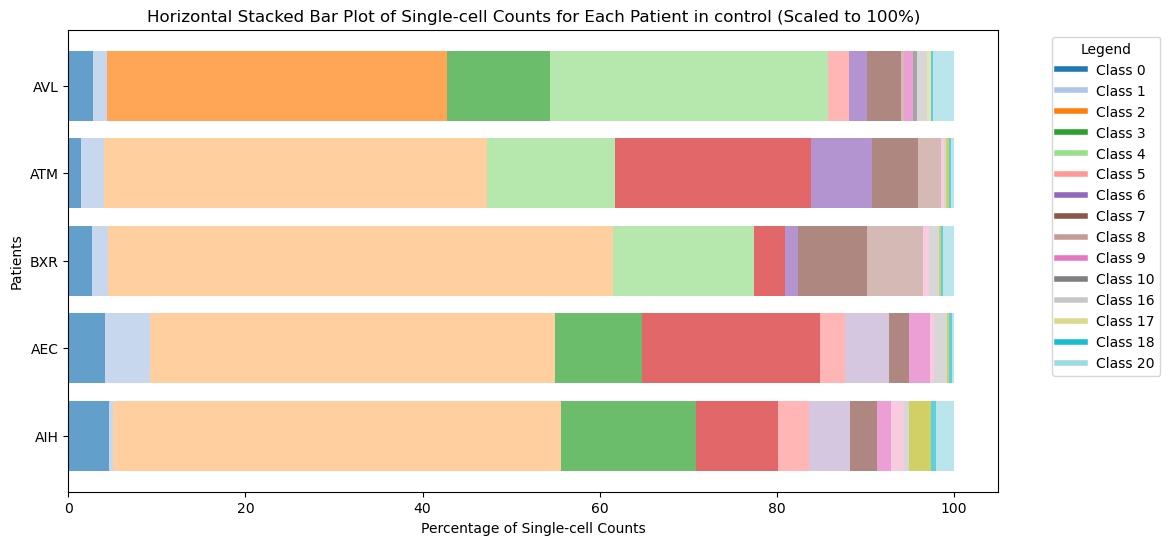

In [38]:
# Path to the folder containing your subfolders
data_path = '../data'

# Iterate over all subfolders in the data folder
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    # Ensure that the item is a directory
    if os.path.isdir(class_path):
        # Initialize lists to store data for plotting
        patient_folder_names = []
        stacked_counts_vectors = []

        # Iterate over all files in the folder
        for patient_folder in os.listdir(class_path):
            if len(patient_folder) == 3:
                probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

                #print(probs_path)
                sc_probs = np.load(probs_path)
                sc_class = np.argmax(sc_probs, axis=1)
                counts_vector, unique_labels = get_counts_vector(sc_class)

                # Normalize counts to percentages
                counts_percentages = counts_vector / np.sum(counts_vector) * 100

                # Create a custom color list for each position
                cmap = get_cmap('tab20', len(unique_labels))
                colors = [cmap(i) for i in range(len(unique_labels))]

                # Append data for plotting
                patient_folder_names.append(patient_folder)
                stacked_counts_vectors.append((counts_percentages, unique_labels, colors))

        # Create a horizontal stacked bar plot for each file in the class
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, (counts_percentages, unique_labels, colors) in enumerate(stacked_counts_vectors):
            left = 0
            for label, color in zip(unique_labels, colors):
                ax.barh(patient_folder_names[i], counts_percentages[label], label=f"Class {label}", alpha=0.7, color=color, left=left)
                left += counts_percentages[label]

        # Create a legend showing which color corresponds to which class label
        legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)]
        ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

        # Add labels and legend
        ax.set_xlabel("Percentage of Single-cell Counts")
        ax.set_ylabel("Patients")
        ax.set_title(f"Horizontal Stacked Bar Plot of Single-cell Counts for Each Patient in {class_folder} (Scaled to 100%)")

        # Show the plot for each class
        plt.show()
